<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_07_pytorch_pipeline_01_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class Imbalance in Machine Learning

**Class imbalance** refers to a situation in a classification problem where the number of instances in different classes is significantly disproportionate. In other words, one class (the majority class) has many more instances than the other class (the minority class).

#### Key Points about Class Imbalance:

1. **Prevalence**:
   - Class imbalance is common in many real-world datasets. Examples include fraud detection (where fraudulent transactions are rare), medical diagnosis (where certain diseases have low prevalence), and spam detection (where spam emails are much fewer than legitimate ones).

2. **Impact on Model Performance**:
   - **Bias Toward Majority Class**: Many machine learning algorithms assume that the classes are balanced. When they are not, the model may become biased toward the majority class, resulting in high accuracy but poor performance on the minority class.
   - **Misleading Metrics**: Accuracy becomes a misleading metric in imbalanced datasets. A model that always predicts the majority class can achieve high accuracy but fails to correctly identify the minority class.
   - **Poor Generalization**: The model might fail to generalize well to unseen data, especially in correctly identifying instances of the minority class.

3. **Performance Metrics for Imbalanced Data**:
   - **Precision**: The proportion of true positives among all predicted positives. Useful when the cost of false positives is high.
   - **Recall (Sensitivity)**: The proportion of true positives among all actual positives. Useful when the cost of false negatives is high.
   - **F1 Score**: The harmonic mean of precision and recall. Provides a balanced measure, especially useful for imbalanced datasets.
   - **ROC-AUC**: Measures the ability of the model to distinguish between classes. The area under the ROC curve (AUC) provides an aggregate measure of performance across all classification thresholds.
   - **Precision-Recall AUC**: Particularly useful for highly imbalanced datasets, focusing on the performance with respect to the minority class.

4. **Techniques to Address Class Imbalance**:
   - **Resampling Techniques**:
     - **Oversampling**: Increasing the number of instances in the minority class. Techniques include Random Oversampling and Synthetic Minority Over-sampling Technique (SMOTE).
     - **Undersampling**: Reducing the number of instances in the majority class. Techniques include Random Undersampling and NearMiss.
   - **Algorithmic Approaches**:
     - **Cost-sensitive Learning**: Assigning different misclassification costs to classes, penalizing the misclassification of the minority class more heavily.
     - **Anomaly Detection Models**: Treating the minority class as anomalies and using specialized models designed for anomaly detection.
   - **Ensemble Methods**:
     - **Balanced Random Forest**: Combining multiple decision trees with resampling to create balanced datasets for each tree.
     - **EasyEnsemble and BalanceCascade**: Combining boosting with undersampling techniques.

5. **Threshold Adjustment**:
   - Adjusting the decision threshold of the classifier to better capture the minority class. For example, lowering the threshold can increase the recall for the minority class at the expense of precision.



### Analyze Class Imbalance
  - Check the distribution of classes in your target variable.
  - Visualize the imbalance using bar plot




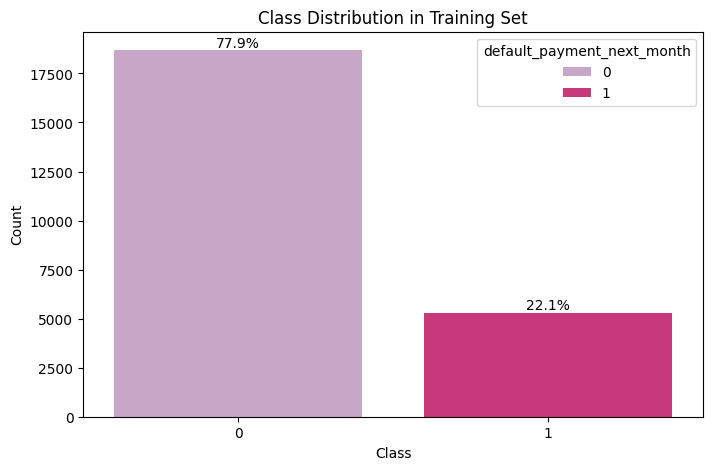

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model_pipeline import load_data_from_url, clean_column_names, remove_id_column, convert_categorical, split_data

# Define dataset-specific parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
data = load_data_from_url(url)
data = clean_column_names(data)
data = remove_id_column(data)
data = convert_categorical(data, categorical_columns=categorical_columns)
X_train, X_test, y_train, y_test = split_data(data, target=target)

# Plot class balance in the training set with ratio annotations
def plot_class_distribution(y_train):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='PuRd')
    plt.title('Class Distribution in Training Set')
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()


In the context of fraud detection, **recall (sensitivity)** is generally considered more important than precision. Here’s why:

### Importance of Recall in Fraud Detection

1. **High Cost of Missing Fraudulent Transactions**:
   - In fraud detection, the primary goal is to identify as many fraudulent transactions as possible. Missing a fraudulent transaction (false negative) can lead to significant financial losses and potential reputational damage. Therefore, having a high recall ensures that most fraudulent transactions are detected.

2. **Accepting Some False Positives**:
   - While false positives (legitimate transactions flagged as fraudulent) can be inconvenient and may require additional verification steps, the consequences are typically less severe than missing a fraudulent transaction. Companies can manually review flagged transactions to confirm their legitimacy, which is a manageable process.

3. **Safety Net**:
   - Ensuring that most fraud cases are caught, even at the expense of some false alarms, provides a safety net that is crucial for protecting financial assets and maintaining customer trust.

### Balancing Precision and Recall

However, it’s important to find a balance that suits the specific context and resources available. Excessive false positives can lead to customer dissatisfaction and increased operational costs due to manual reviews. Therefore, while recall is prioritized, precision should not be completely disregarded.

### Practical Approach in Fraud Detection

1. **Adjusting the Threshold**:
   - As mentioned earlier, adjusting the decision threshold can help balance recall and precision. Lowering the threshold increases recall but may reduce precision.

2. **Using Evaluation Metrics**:
   - **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be a useful metric to find a balance. However, if recall is the priority, you might focus more on maximizing recall even if the F1 score is slightly lower.

3. **Implementing Resampling Techniques**:
   - Techniques like SMOTE or balanced random forests can help improve model performance on the minority class.

4. **Post-Processing**:
   - Implementing rules or secondary models to review flagged transactions can help manage false positives. For example, flagging transactions for manual review if they fall into a certain range of probabilities.




### Refactor Load and Process Steps

In [ ]:
# Function to be added to model_pipeline.py
script_content = """
import pandas as pd
import torch
from model_pipeline import (
    load_data_from_url,
    clean_column_names,
    remove_id_column,
    convert_categorical,
    split_data,
    define_preprocessor,
    preprocess_data
)

def load_and_preprocess_data(url, categorical_columns, target):
    \"""
    Load and preprocess data from the given URL.

    Parameters:
    url (str): URL of the dataset.
    categorical_columns (list): List of categorical column names.
    target (str): Target column name.

    Returns:
    tuple: Processed training and testing data along with PyTorch tensors.
    \"""
    # Load and preprocess data
    data = load_data_from_url(url)
    data = clean_column_names(data)
    data = remove_id_column(data)
    data = convert_categorical(data, categorical_columns=categorical_columns)
    X_train, X_test, y_train, y_test = split_data(data, target=target)
    preprocessor = define_preprocessor(X_train)
    X_train_processed, X_test_processed = preprocess_data(preprocessor, X_train, X_test)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    return X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
"""

# Append the function to model_pipeline.py
with open("model_pipeline.py", "a") as file:
    file.write(script_content)

print("Function appended successfully to model_pipeline.py")

# reload script to make function available for use
# Reload the module
import importlib
import model_pipeline
importlib.reload(model_pipeline)

## Experiment with Different Class Weights

In [ ]:
# Function to be added to model_pipeline.py
script_content = """
import pandas as pd
import torch
from model_pipeline import (
    load_data_from_url,
    clean_column_names,
    remove_id_column,
    convert_categorical,
    split_data,
    define_preprocessor,
    preprocess_data
)

def load_and_preprocess_data(url, categorical_columns, target):
    \"""
    Load and preprocess data from the given URL.

    Parameters:
    url (str): URL of the dataset.
    categorical_columns (list): List of categorical column names.
    target (str): Target column name.

    Returns:
    tuple: Processed training and testing data along with PyTorch tensors.
    \"""
    # Load and preprocess data
    data = load_data_from_url(url)
    data = clean_column_names(data)
    data = remove_id_column(data)
    data = convert_categorical(data, categorical_columns=categorical_columns)
    X_train, X_test, y_train, y_test = split_data(data, target=target)
    preprocessor = define_preprocessor(X_train)
    X_train_processed, X_test_processed = preprocess_data(preprocessor, X_train, X_test)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    return X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
"""

# Append the function to model_pipeline.py
with open("model_pipeline.py", "a") as file:
    file.write(script_content)

print("Function appended successfully to model_pipeline.py")

# Reload the module
import importlib
import model_pipeline
importlib.reload(model_pipeline)

# Import necessary functions and classes
from model_pipeline import SklearnSimpleNN, train_model, evaluate_model, load_and_preprocess_data

# Define dataset-specific parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = load_and_preprocess_data(url, categorical_columns, target)

# Function to evaluate the model with different class weights
def evaluate_class_weights(class_weights):
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])
    nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
    y_pred = nn_estimator.predict(X_test_tensor.numpy())
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1

# Generate a range of class weights to test
class_weight_range = np.linspace(0.5, 5.0, 10)
best_f1 = 0
best_weights = None

for weight in class_weight_range:
    class_weights = [1.0, weight]
    f1 = evaluate_class_weights(class_weights)
    print(f"Class weights: {class_weights}, F1-score: {f1}")
    if f1 > best_f1:
        best_f1 = f1
        best_weights = class_weights

print(f"Best class weights: {best_weights}, Best F1-score: {best_f1}")

# Train and evaluate the model with the best class weights
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=best_weights[1])
nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
evaluate_model(nn_estimator, X_test_tensor, y_test_tensor)


Function appended successfully to model_pipeline.py
Class weights: [1.0, 0.5], F1-score: 0.3459522422830518
Class weights: [1.0, 1.0], F1-score: 0.48862052949372964
Class weights: [1.0, 1.5], F1-score: 0.5107692307692308
Class weights: [1.0, 2.0], F1-score: 0.5147364051473641
Class weights: [1.0, 2.5], F1-score: 0.5268366958507802
Class weights: [1.0, 3.0], F1-score: 0.5283422459893047
Class weights: [1.0, 3.5], F1-score: 0.5228113440197288
Class weights: [1.0, 4.0], F1-score: 0.5165523411869967
Class weights: [1.0, 4.5], F1-score: 0.5043149946062567
Class weights: [1.0, 5.0], F1-score: 0.4855662472242784
Best class weights: [1.0, 3.0], Best F1-score: 0.5283422459893047


In [16]:
import numpy as np
from sklearn.metrics import f1_score
from model_pipeline import SklearnSimpleNN, train_model, evaluate_model, load_and_preprocess_data

# Define dataset-specific parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = load_and_preprocess_data(url, categorical_columns, target)

# Function to evaluate the model with different class weights
def evaluate_class_weights(class_weights):
    nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])
    nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
    y_pred = nn_estimator.predict(X_test_tensor.numpy())
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    return f1

# Generate a range of class weights to test
class_weight_range = np.linspace(0.5, 5.0, 10)
best_f1 = 0
best_weights = None

for weight in class_weight_range:
    class_weights = [1.0, weight]
    f1 = evaluate_class_weights(class_weights)
    print(f"Class weights: {class_weights}, F1-score: {f1}")
    if f1 > best_f1:
        best_f1 = f1
        best_weights = class_weights

print(f"Best class weights: {best_weights}, Best F1-score: {best_f1}")

# Train and evaluate the model with the best class weights
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=best_weights[1])
nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
evaluate_model(nn_estimator, X_test_tensor, y_test_tensor)

# import numpy as np
# from sklearn.metrics import classification_report, f1_score
# from model_pipeline import SklearnSimpleNN, train_model, evaluate_model

# # Define dataset-specific parameters
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
# categorical_columns = ['sex', 'education', 'marriage']
# target = 'default_payment_next_month'

# # Load and preprocess data
# X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = load_and_preprocess_data(url, categorical_columns, target)

# # Function to evaluate the model with different class weights
# def evaluate_class_weights(class_weights):
#     nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=class_weights[1])
#     nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
#     y_pred = nn_estimator.predict(X_test_tensor.numpy())
#     f1 = f1_score(y_test_tensor.numpy(), y_pred)
#     return f1

# # Generate a range of class weights to test
# class_weight_range = np.linspace(0.5, 5.0, 10)
# best_f1 = 0
# best_weights = None

# for weight in class_weight_range:
#     class_weights = [1.0, weight]
#     f1 = evaluate_class_weights(class_weights)
#     print(f"Class weights: {class_weights}, F1-score: {f1}")
#     if f1 > best_f1:
#         best_f1 = f1
#         best_weights = class_weights

# print(f"Best class weights: {best_weights}, Best F1-score: {best_f1}")

# # Train and evaluate the model with the best class weights
# nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=best_weights[1])
# nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)
# evaluate_model(nn_estimator, X_test_tensor, y_test_tensor)

ImportError: cannot import name 'load_and_preprocess_data' from 'model_pipeline' (/content/model_pipeline.py)

In [6]:
print(best_weights)

[1.0, 2.5]


### Understanding Threshold in Machine Learning

**Threshold** refers to the value at which a continuous output from a model is converted into a binary classification. In many classification models, the output is a probability score between 0 and 1 that represents the likelihood of a given instance belonging to a positive class. The threshold is the cutoff point that determines which class the instance is assigned to.

#### How Threshold Affects Class Imbalance and Model Performance

1. **Class Imbalance**:
   - In datasets with class imbalance, where one class is significantly more frequent than the other, the default threshold (usually 0.5) might not be optimal. For example, if you have a dataset where only 5% of the instances belong to the positive class, a model might output low probability scores for most instances. If you stick with a 0.5 threshold, the model will likely classify almost all instances as the negative class, leading to poor performance on the minority class.

2. **Adjusting the Threshold**:
   - **Lowering the Threshold**: By lowering the threshold (e.g., to 0.3 or 0.2), you increase the sensitivity of the model, allowing it to classify more instances as positive. This can improve the recall for the minority class but may reduce precision, leading to more false positives.
   - **Raising the Threshold**: Conversely, increasing the threshold (e.g., to 0.7 or 0.8) makes the model more conservative, classifying fewer instances as positive. This can improve precision but reduce recall, leading to more false negatives.

3. **Model Performance Metrics**:
   - The choice of threshold affects various performance metrics differently. Key metrics include:
     - **Accuracy**: The overall correctness of the model. However, it can be misleading in imbalanced datasets.
     - **Precision**: The proportion of true positives among all predicted positives. Sensitive to false positives.
     - **Recall (Sensitivity)**: The proportion of true positives among all actual positives. Sensitive to false negatives.
     - **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
     - **ROC Curve and AUC**: The ROC curve plots the true positive rate against the false positive rate at various threshold settings. The AUC (Area Under the Curve) provides a single measure of model performance, regardless of the threshold.

4. **Choosing the Optimal Threshold**:
   - The optimal threshold depends on the specific goals and constraints of your project. For example, in medical diagnosis, you might prioritize recall to ensure that as many actual positive cases are identified as possible. In fraud detection, precision might be more critical to minimize false positives.
   - Techniques such as Precision-Recall curves, ROC curves, and Grid Search can help in determining the most suitable threshold for your model.




### Testing Different Thresholds

Threshold: 0.10, F1-score: 0.5241, Precision: 0.5447, Recall: 0.5049
Threshold: 0.20, F1-score: 0.5227, Precision: 0.5642, Recall: 0.4868
Threshold: 0.30, F1-score: 0.5185, Precision: 0.5790, Recall: 0.4695
Threshold: 0.40, F1-score: 0.5157, Precision: 0.6028, Recall: 0.4506
Threshold: 0.50, F1-score: 0.4996, Precision: 0.6073, Recall: 0.4243
Threshold: 0.60, F1-score: 0.4950, Precision: 0.6229, Recall: 0.4107
Threshold: 0.70, F1-score: 0.4821, Precision: 0.6283, Recall: 0.3911
Threshold: 0.80, F1-score: 0.4730, Precision: 0.6353, Recall: 0.3768


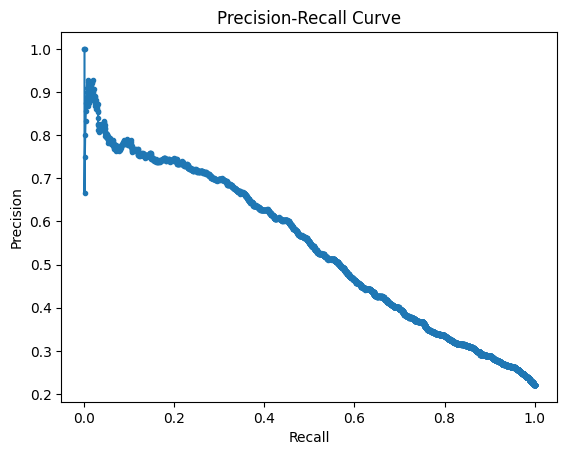

In [10]:
import numpy as np
import torch
from sklearn.metrics import classification_report, precision_recall_curve, f1_score, precision_score, recall_score
# from model_pipeline import load_and_preprocess_data, SklearnSimpleNN, train_model

# Define dataset-specific parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X_train, X_test, y_train, y_test, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = load_and_preprocess_data(url, categorical_columns, target)

# Best class weights obtained from previous evaluation
best_weights = best_weights

# Train the model with the best class weights
nn_estimator = SklearnSimpleNN(input_dim=X_train_tensor.shape[1], pos_weight=best_weights[1])
nn_estimator = train_model(nn_estimator, X_train_tensor, y_train_tensor)

# Predict probabilities on the test set
y_prob = nn_estimator.model(X_test_tensor).detach().numpy().squeeze()

# Function to evaluate model performance at different thresholds
def evaluate_thresholds(y_prob, y_test_tensor, thresholds):
    results = []
    for threshold in thresholds:
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_test_tensor.numpy(), y_pred)
        precision = precision_score(y_test_tensor.numpy(), y_pred)
        recall = recall_score(y_test_tensor.numpy(), y_pred)
        results.append((threshold, f1, precision, recall))
        print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    return results

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 0.9, 0.1)

# Evaluate and print the results for each threshold
results = evaluate_thresholds(y_prob, y_test_tensor, thresholds)

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_tensor.numpy(), y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

To interpret the precision-recall data and the plot, let's break down the metrics and what they signify:

### Metrics Explanation

1. **Threshold**:
    - This is the decision threshold for classifying a positive instance. For example, a threshold of 0.10 means that if the predicted probability is greater than 0.10, the instance is classified as positive.

2. **F1-Score**:
    - The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that captures both.

3. **Precision**:
    - Precision (or positive predictive value) is the ratio of true positive predictions to the total number of positive predictions. High precision indicates that the model is making fewer false positive errors.

4. **Recall**:
    - Recall (or sensitivity) is the ratio of true positive predictions to the total number of actual positives. High recall indicates that the model is capturing most of the positive instances.

### Interpretation of the Data

#### Precision-Recall Trade-Off

- As you increase the threshold:
    - **Precision tends to increase**: This is because the model becomes more conservative, classifying fewer instances as positive, thus reducing false positives.
    - **Recall tends to decrease**: The model is less likely to classify instances as positive, increasing the chance of false negatives.

- At a lower threshold (e.g., 0.10):
    - The model is more lenient in classifying instances as positive, leading to higher recall but lower precision.
    - This means the model captures more true positives but also includes more false positives.

- At a higher threshold (e.g., 0.80):
    - The model is more stringent, leading to higher precision but lower recall.
    - This means the model is more accurate in its positive predictions but misses more true positives.

### Plot Interpretation

#### Precision-Recall Curve

- The Precision-Recall curve is a plot of precision (y-axis) against recall (x-axis) at various threshold settings.
    - **A good model** will have a curve that bows towards the top right corner, indicating high precision and high recall.

#### Your Plot

- The curve helps visualize the trade-off between precision and recall.
- By examining the curve, you can choose a threshold that balances the two metrics according to your application's needs.

### Choosing the Optimal Threshold

- **Context-Dependent**: The optimal threshold depends on the specific context and goals of your application.
    - If false positives are costly, you might prefer a higher threshold to increase precision.
    - If false negatives are more critical, you might choose a lower threshold to increase recall.

### Example Decision

- In your data:
    - At a threshold of 0.10, you have an F1-score of 0.5352, precision of 0.5295, and recall of 0.5411.
    - At a threshold of 0.50, the F1-score is 0.5104, precision is 0.5808, and recall is 0.4552.
    - If you prioritize recall, a lower threshold like 0.10 might be more suitable.
    - If you prioritize precision, a higher threshold like 0.50 or 0.60 might be better.

### Summary

- Use the precision-recall curve to visualize and decide on the optimal threshold.
- Choose the threshold that best balances precision and recall according to your application's requirements.
- The F1-score can guide you to find a balanced point, but the final decision should consider the specific costs and benefits of precision and recall in your context.

Would you like to implement this analysis or need further assistance with any specific part?